# Program 7(a):Implement K-Nearest Neighbors(K-NN)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
print('N0. of zero values in Glucose',df[df['Glucose']==0].shape[0])
print('N0. of zero values in BloodPressure',df[df['BloodPressure']==0].shape[0])
print('N0. of zero values in SkinThickness',df[df['SkinThickness']==0].shape[0])
print('N0. of zero values in Insulin',df[df['Insulin']==0].shape[0])
print('N0. of zero values in BMI',df[df['BMI']==0].shape[0])

N0. of zero values in Glucose 5
N0. of zero values in BloodPressure 35
N0. of zero values in SkinThickness 227
N0. of zero values in Insulin 374
N0. of zero values in BMI 11


In [4]:
#replace zero values with mean
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [5]:
print('N0. of zero values in Glucose',df[df['Glucose']==0].shape[0])
print('N0. of zero values in BloodPressure',df[df['BloodPressure']==0].shape[0])
print('N0. of zero values in SkinThickness',df[df['SkinThickness']==0].shape[0])
print('N0. of zero values in Insulin',df[df['Insulin']==0].shape[0])
print('N0. of zero values in BMI',df[df['BMI']==0].shape[0])

N0. of zero values in Glucose 0
N0. of zero values in BloodPressure 0
N0. of zero values in SkinThickness 0
N0. of zero values in Insulin 0
N0. of zero values in BMI 0


In [6]:
x=df[['Pregnancies','Insulin','SkinThickness','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']]
y=df['Outcome']

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
X=scaler.transform(x)

In [8]:
# Splitting Dataset into Training and Test Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [10]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7662337662337663


In [11]:
error_rate=[]
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred_i=knn.predict(x_test)
    
    error_rate.append(np.mean(y_pred_i!=y_test))

In [12]:
error_rate

[0.2727272727272727,
 0.2597402597402597,
 0.2532467532467532,
 0.24675324675324675,
 0.24675324675324675,
 0.23376623376623376,
 0.23376623376623376,
 0.24675324675324675,
 0.2532467532467532]

Text(0, 0.5, 'Error Rate')

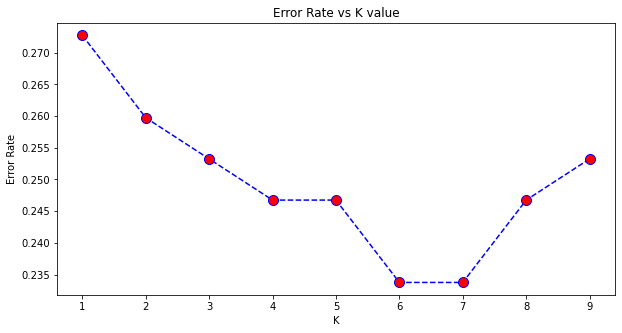

In [13]:
plt.figure(figsize=(10,5))
plt.plot(range(1,10),error_rate,color='blue',ls='--'
         ,marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [14]:
from sklearn.metrics import accuracy_score,classification_report
knn=knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print("Classification report")
print(classification_report(y_test,y_pred))

Classification report
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154

